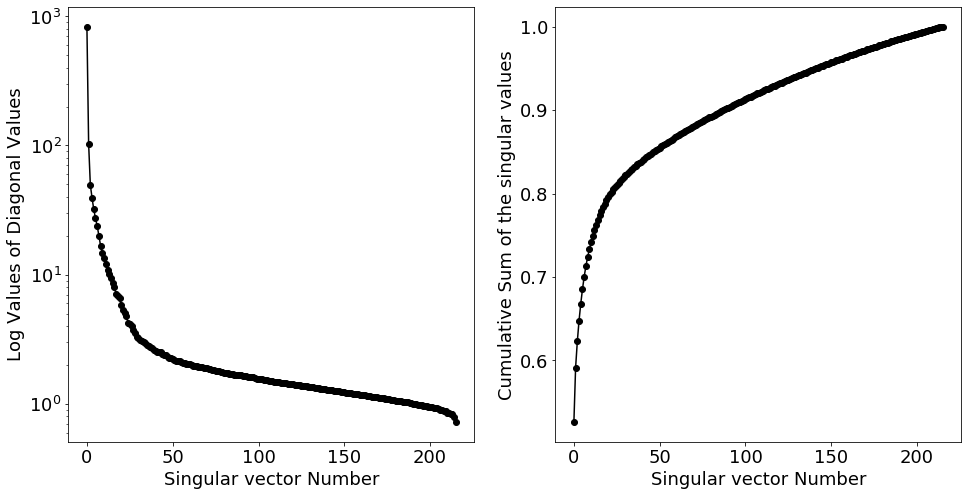

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

obs = np.loadtxt(('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/ovariancancer_obs.csv'),delimiter=',')
f = open(os.path.join('/Users/samue/Desktop/Dr Steven, University of Washington SVD Lectures/DATA/ovariancancer_grp.csv'), "r")
grp = f.read().split("\n")

U, S, VT = np.linalg.svd(obs,full_matrices=False)

fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
ax1.semilogy(S,'-o',color='k')
plt.xlabel('Singular vector Number')
plt.ylabel('Log Values of Diagonal Values')

ax2 = fig1.add_subplot(122)
ax2.plot(np.cumsum(S)/np.sum(S),'-o',color='k')
plt.xlabel('Singular vector Number')
plt.ylabel('Cumulative Sum of the singular values')
plt.show()

In [26]:
obs

array([[ 0.063915 ,  0.033242 ,  0.018484 , ...,  0.038839 ,  0.038151 ,
         0.032085 ],
       [ 0.025409 ,  0.051085 ,  0.056305 , ...,  0.020427 ,  0.023261 ,
         0.019975 ],
       [ 0.025536 ,  0.036123 ,  0.054195 , ..., -0.0094466,  0.021481 ,
         0.025569 ],
       ...,
       [ 0.023558 ,  0.021331 ,  0.01621  , ...,  0.0082736,  0.004742 ,
         0.024756 ],
       [ 0.028351 ,  0.023266 ,  0.0045561, ...,  0.010033 ,  0.017391 ,
         0.031537 ],
       [ 0.027428 ,  0.027021 ,  0.015273 , ...,  0.026642 ,  0.027718 ,
         0.040418 ]])

In [27]:
VT.shape

(216, 4000)

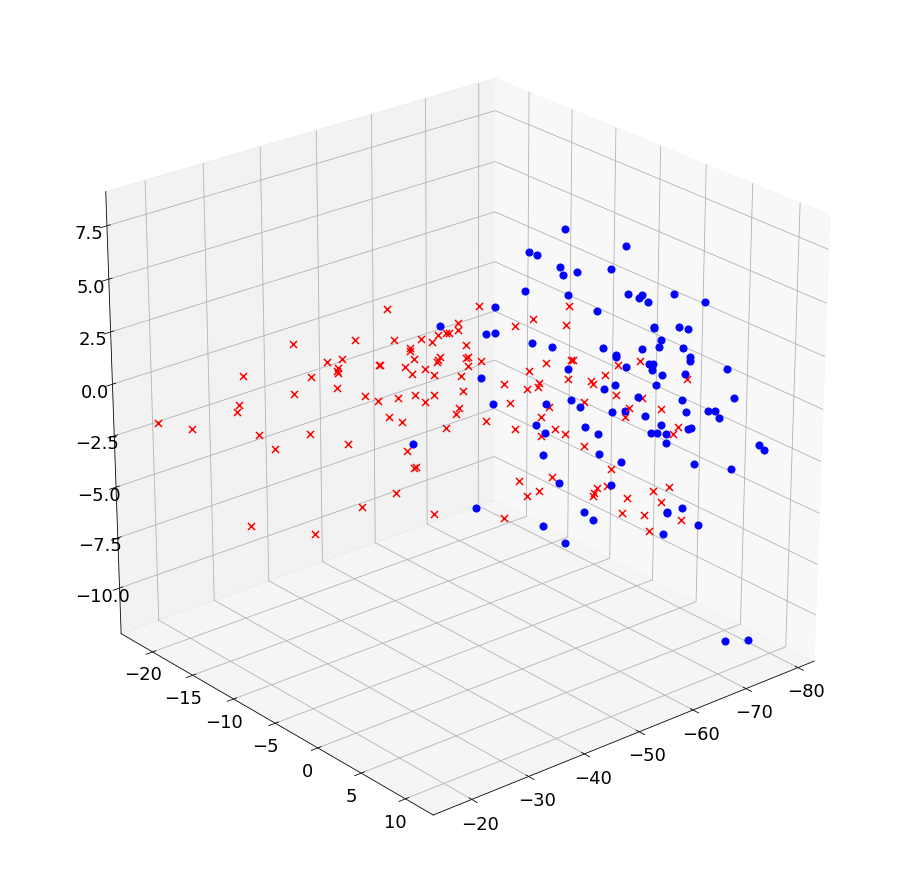

In [28]:
plt.rcParams['figure.figsize'] = [16,16]
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

for j in range(obs.shape[0]): #for every row of the data matrix, every person
    x = VT[0,:] @ obs[j,:].T #pc1 = VT 0th row @ jth row of the data matrix, outer product of col
    y = VT[1,:] @ obs[j,:].T #pc2
    z = VT[2,:] @ obs[j,:].T #pc3
    
    if grp[j] == 'Cancer':
        ax.scatter(x,y,z,marker='x',color='r',s=50)
    else:
        ax.scatter(x,y,z,marker='o',color='b',s=50)

ax.view_init(25,50)
plt.show()


As we increase the number of PC, we will see that the spread of the data to cluster together should seperate even better but not so much, since we can see the log graph, the first few single values cumulative sum

IndexError: tuple index out of range